# Pressure Scan
K. Sjobak, October 23rd 2018

Scan the pressure in various gasses to see the effect on the beam emittance.

## System setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
%matplotlib notebook

# plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams['figure.dpi'] = 100

# #colorCycle = plt.rcParams['axes.prop_cycle']
# plt.rcParams['figure.max_open_warning'] = 100

In [3]:
#Setup MiniScatter
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner

Welcome to JupyROOT 6.14/02


/usr/lib64/python3.6/site-packages/ROOT.py:461: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return _orig_ihook( name, *args, **kwds )


## General scan parameters

In [4]:
#Basic parameters
NUM_THREADS = 16
QUIET = True
TRYLOAD = False #Try to load already existing data instead of recomputing?

baseSimSetup = {}
baseSimSetup["PHYS"] = "QGSP_BERT__SS"
baseSimSetup["BEAM"] = "e-"

baseSimSetup["THICK"] = 15 #Target thickness [mm]

baseSimSetup["ENERGY"] = 215.0 #[MeV]
EPS   = 3.0 #[um]
BETA  = 1.4 #[m]
ALPHA = 0.0
baseSimSetup["COVAR"] = (EPS,BETA,ALPHA)

baseSimSetup["ZOFFSET"] = -baseSimSetup["THICK"]
baseSimSetup["ZOFFSET_BACKTRACK"]=True

baseSimSetup["DIST"] = 1000.0 #[mm]

baseSimSetup["QUICKMODE"] = True #Skip verification plots
#baseSimSetup["N"] = 10000000
baseSimSetup["N"] = int(1e7)

#SEED = 1 # starting seed

baseSimSetup["CUTOFF_RADIUS"]=10000.0
baseSimSetup["CUTOFF_ENERGYFRACTION"] = 0.95

#Some derived quantities
gamma_rel = baseSimSetup["ENERGY"]/0.511 #assume electron beam!
beta_rel  = np.sqrt(gamma_rel**2 - 1.0) / gamma_rel;
print(gamma_rel, beta_rel)

#The scan
#press = np.logspace(np.log10(0.5),np.log10(100), 30) #[mbar]
#COMMENT="LOGSPACE"

press = np.linspace(0.5,100,30)
#press = np.linspace(0.5,100,3)

print("press =", press, "[mbar]")

def makeMatStrings(gas):
    matStrings_press = []
    for p in press:
        matStrings_press.append(gas+"::"+str(p))
    return matStrings_press

420.7436399217221 0.9999971755395483
press = [  0.5          3.93103448   7.36206897  10.79310345  14.22413793
  17.65517241  21.0862069   24.51724138  27.94827586  31.37931034
  34.81034483  38.24137931  41.67241379  45.10344828  48.53448276
  51.96551724  55.39655172  58.82758621  62.25862069  65.68965517
  69.12068966  72.55172414  75.98275862  79.4137931   82.84482759
  86.27586207  89.70689655  93.13793103  96.56896552 100.        ] [mbar]


## Data generation / loading

In [5]:
baseSimSetup_Ar = baseSimSetup.copy()

pressScan_Ar = makeMatStrings("Ar")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_Ar, numPart_Ar, objects_Ar, analysis_output_Ar) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_Ar,baseSimSetup_Ar, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_Ar", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_Ar = twiss_Ar['tracker_cutoff']['x']['eps']
eps_y_Ar = twiss_Ar['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_Ar['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_Ar['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_Ar.h5' False
MAT = Ar::0.5 (1/30)
MAT = Ar::3.9310344827586206 (2/30)
MAT = Ar::7.362068965517241 (3/30)
MAT = Ar::10.793103448275861 (4/30)
MAT = Ar::14.224137931034482 (5/30)
MAT = Ar::17.655172413793103 (6/30)
MAT = Ar::21.086206896551722 (7/30)
MAT = Ar::24.517241379310345 (8/30)
MAT = Ar::27.948275862068964 (9/30)
MAT = Ar::31.379310344827584 (10/30)
MAT = Ar::34.810344827586206 (11/30)
MAT = Ar::38.241379310344826 (12/30)
MAT = Ar::41.672413793103445 (13/30)
MAT = Ar::45.103448275862064 (14/30)
MAT = Ar::48.53448275862069 (15/30)
MAT = Ar::51.96551724137931 (16/30)
MAT = Ar::55.39655172413793 (17/30)
Found pdg=1000180400 for detector=target
Found pdg=1000180400 for detector=target_cutoff
MAT = Ar::58.82758620689655 (18/30)
MAT = Ar::62.25862068965517 (19/30)
MAT = Ar::65.6896551724138 (20/30)
MAT = Ar::69.12068965517241 (21/30)
MAT = Ar::72.55172413793103 (22/30)
MAT = Ar::75.98275862068965 (23/30)
Found pdg=1000180400 for dete

In [6]:
baseSimSetup_He = baseSimSetup.copy()

pressScan_He = makeMatStrings("He")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_He, numPHet_He, objects_He, analysis_output_He) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_He,baseSimSetup_He, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_He", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_He = twiss_He['tracker_cutoff']['x']['eps']
eps_y_He = twiss_He['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_He['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_He['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_He.h5' False
MAT = He::0.5 (1/30)
MAT = He::3.9310344827586206 (2/30)
MAT = He::7.362068965517241 (3/30)
MAT = He::10.793103448275861 (4/30)
MAT = He::14.224137931034482 (5/30)
MAT = He::17.655172413793103 (6/30)
MAT = He::21.086206896551722 (7/30)
MAT = He::24.517241379310345 (8/30)
MAT = He::27.948275862068964 (9/30)
MAT = He::31.379310344827584 (10/30)
MAT = He::34.810344827586206 (11/30)
MAT = He::38.241379310344826 (12/30)
MAT = He::41.672413793103445 (13/30)
MAT = He::45.103448275862064 (14/30)
MAT = He::48.53448275862069 (15/30)
MAT = He::51.96551724137931 (16/30)
MAT = He::55.39655172413793 (17/30)
MAT = He::58.82758620689655 (18/30)
MAT = He::62.25862068965517 (19/30)
MAT = He::65.6896551724138 (20/30)
MAT = He::69.12068965517241 (21/30)
MAT = He::72.55172413793103 (22/30)
MAT = He::75.98275862068965 (23/30)
MAT = He::79.41379310344827 (24/30)
MAT = He::82.84482758620689 (25/30)
MAT = He::86.27586206896551 (26/30)
MAT = He::

In [7]:
baseSimSetup_N2 = baseSimSetup.copy()

pressScan_N2 = makeMatStrings("N_2")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_N2, numPN2t_N2, objects_N2, analysis_output_N2) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_N2,baseSimSetup_N2, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_N2", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_N2 = twiss_N2['tracker_cutoff']['x']['eps']
eps_y_N2 = twiss_N2['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_N2['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_N2['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_N2.h5' False
MAT = N_2::0.5 (1/30)
MAT = N_2::3.9310344827586206 (2/30)
MAT = N_2::7.362068965517241 (3/30)
MAT = N_2::10.793103448275861 (4/30)
MAT = N_2::14.224137931034482 (5/30)
MAT = N_2::17.655172413793103 (6/30)
MAT = N_2::21.086206896551722 (7/30)
MAT = N_2::24.517241379310345 (8/30)
MAT = N_2::27.948275862068964 (9/30)
MAT = N_2::31.379310344827584 (10/30)
MAT = N_2::34.810344827586206 (11/30)
MAT = N_2::38.241379310344826 (12/30)
MAT = N_2::41.672413793103445 (13/30)
MAT = N_2::45.103448275862064 (14/30)
MAT = N_2::48.53448275862069 (15/30)
MAT = N_2::51.96551724137931 (16/30)
MAT = N_2::55.39655172413793 (17/30)
MAT = N_2::58.82758620689655 (18/30)
MAT = N_2::62.25862068965517 (19/30)
MAT = N_2::65.6896551724138 (20/30)
MAT = N_2::69.12068965517241 (21/30)
MAT = N_2::72.55172413793103 (22/30)
MAT = N_2::75.98275862068965 (23/30)
MAT = N_2::79.41379310344827 (24/30)
MAT = N_2::82.84482758620689 (25/30)
MAT = N_2::86.2758620

In [8]:
baseSimSetup_Ne = baseSimSetup.copy()

pressScan_Ne = makeMatStrings("Ne")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_Ne, numPNet_Ne, objects_Ne, analysis_output_Ne) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_Ne,baseSimSetup_Ne, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_Ne", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_Ne = twiss_Ne['tracker_cutoff']['x']['eps']
eps_y_Ne = twiss_Ne['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_Ne['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_Ne['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_Ne.h5' False
MAT = Ne::0.5 (1/30)
MAT = Ne::3.9310344827586206 (2/30)
MAT = Ne::7.362068965517241 (3/30)
MAT = Ne::10.793103448275861 (4/30)
MAT = Ne::14.224137931034482 (5/30)
MAT = Ne::17.655172413793103 (6/30)
MAT = Ne::21.086206896551722 (7/30)
MAT = Ne::24.517241379310345 (8/30)
MAT = Ne::27.948275862068964 (9/30)
MAT = Ne::31.379310344827584 (10/30)
MAT = Ne::34.810344827586206 (11/30)
MAT = Ne::38.241379310344826 (12/30)
MAT = Ne::41.672413793103445 (13/30)
MAT = Ne::45.103448275862064 (14/30)
MAT = Ne::48.53448275862069 (15/30)
MAT = Ne::51.96551724137931 (16/30)
MAT = Ne::55.39655172413793 (17/30)
MAT = Ne::58.82758620689655 (18/30)
MAT = Ne::62.25862068965517 (19/30)
MAT = Ne::65.6896551724138 (20/30)
MAT = Ne::69.12068965517241 (21/30)
MAT = Ne::72.55172413793103 (22/30)
MAT = Ne::75.98275862068965 (23/30)
MAT = Ne::79.41379310344827 (24/30)
MAT = Ne::82.84482758620689 (25/30)
MAT = Ne::86.27586206896551 (26/30)
MAT = Ne::

In [9]:
baseSimSetup_H2 = baseSimSetup.copy()

pressScan_H2 = makeMatStrings("H_2")

TRYLOAD_def = TRYLOAD
#TRYLOAD = False

(twiss_H2, numPH2t_H2, objects_H2, analysis_output_H2) = \
    miniScatterScanner.ScanMiniScatter("MAT",pressScan_H2,baseSimSetup_H2, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=TRYLOAD,\
                                       COMMENT="pressScan_H2", QUIET=QUIET)
TRYLOAD = TRYLOAD_def

eps_x_H2 = twiss_H2['tracker_cutoff']['x']['eps']
eps_y_H2 = twiss_H2['tracker_cutoff']['y']['eps']

#plt.figure()
#plt.semilogx(press,twiss_H2['tracker_cutoff']['x']['eps'])
#plt.semilogx(press,twiss_H2['tracker_cutoff']['y']['eps'])
#plt.show()

LoadFile filename and status: 'SaveSim_MAT_pressScan_H2.h5' False
MAT = H_2::0.5 (1/30)
MAT = H_2::3.9310344827586206 (2/30)
MAT = H_2::7.362068965517241 (3/30)
MAT = H_2::10.793103448275861 (4/30)
MAT = H_2::14.224137931034482 (5/30)
MAT = H_2::17.655172413793103 (6/30)
MAT = H_2::21.086206896551722 (7/30)
MAT = H_2::24.517241379310345 (8/30)
MAT = H_2::27.948275862068964 (9/30)
MAT = H_2::31.379310344827584 (10/30)
MAT = H_2::34.810344827586206 (11/30)
MAT = H_2::38.241379310344826 (12/30)
MAT = H_2::41.672413793103445 (13/30)
MAT = H_2::45.103448275862064 (14/30)
MAT = H_2::48.53448275862069 (15/30)
MAT = H_2::51.96551724137931 (16/30)
MAT = H_2::55.39655172413793 (17/30)
MAT = H_2::58.82758620689655 (18/30)
MAT = H_2::62.25862068965517 (19/30)
MAT = H_2::65.6896551724138 (20/30)
MAT = H_2::69.12068965517241 (21/30)
MAT = H_2::72.55172413793103 (22/30)
MAT = H_2::75.98275862068965 (23/30)
MAT = H_2::79.41379310344827 (24/30)
MAT = H_2::82.84482758620689 (25/30)
MAT = H_2::86.2758620

## Plotting

<IPython.core.display.Javascript object>


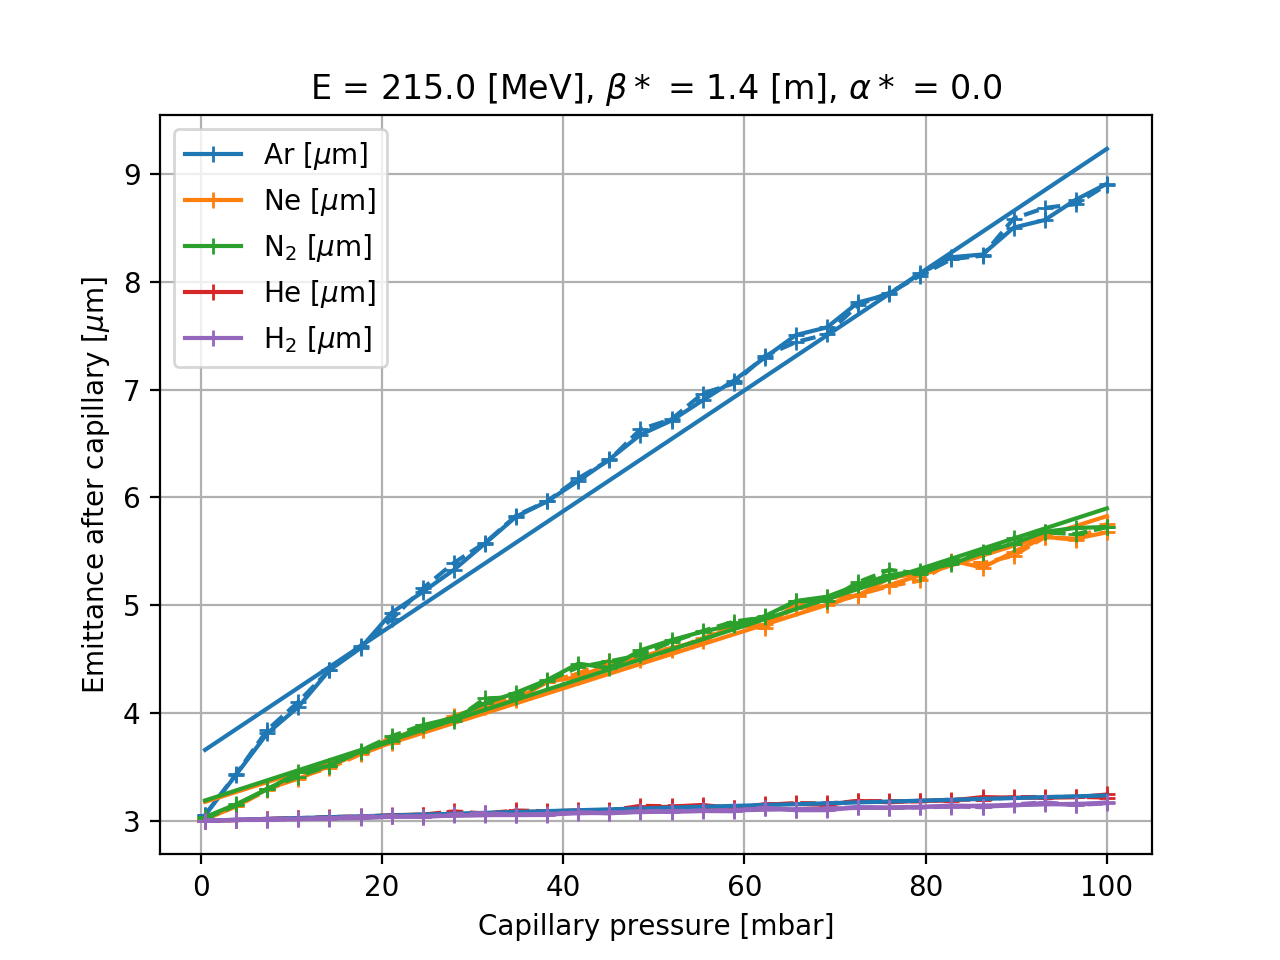

Ar fit:
 eps = 0.056051107232559516*press + 3.6299474336388546, R=0.9915316576250192, P=4.02259757915175e-53, ERR=0.0009639542571591706

Ne fit:
 eps = 0.026643766859573904*press + 3.16236345986065, R=0.9956128453839667, P=2.2167540171296432e-61, ERR=0.0003287916293623953

N2 fit:
 eps = 0.02724069151581278*press + 3.1747490726254926, R=0.9954811111619543, P=5.2186050917990884e-61, ERR=0.0003412013549149655

He fit:
 eps = 0.0023511657658622474*press + 2.9998214013543434, R=0.9916148338712545, P=3.024698019268353e-53, ERR=4.023321608354515e-05

H2 fit:
 eps = 0.001607824272765848*press + 3.002136886414647, R=0.9859157301605296, P=9.516248971455118e-47, ERR=3.581231242940713e-05



In [10]:
plt.figure()
plt.clf()

l_Ar = plt.plot(press, eps_x_Ar, '+-', label=r"Ar [$\mu$m]")[0]
plt.plot(press, eps_y_Ar, '+--', color=l_Ar.get_color())
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_Ar,eps_y_Ar]))
plt.plot(press,intercept+press*slope, color=l_Ar.get_color())
print("Ar fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

l_Ne = plt.plot(press, eps_x_Ne, '+-', label=r"Ne [$\mu$m]")[0]
plt.plot(press, eps_y_Ne, '+--', color=l_Ne.get_color())
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_Ne,eps_y_Ne]))
plt.plot(press,intercept+press*slope, color=l_Ne.get_color())
print("Ne fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

l_N2 = plt.plot(press, eps_x_N2, '+-', label=r"N$_2$ [$\mu$m]")[0]
plt.plot(press, eps_y_N2, '+--', color=l_N2.get_color())
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_N2,eps_y_N2]))
plt.plot(press,intercept+press*slope, color=l_N2.get_color())
print("N2 fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

l_He = plt.plot(press, eps_x_He, '+-', label=r"He [$\mu$m]")[0]
plt.plot(press, eps_y_He, '+--', color=l_He.get_color())
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_He,eps_y_He]))
plt.plot(press,intercept+press*slope, color=l_Ar.get_color())
print("He fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

l_H2 = plt.plot(press, eps_x_H2, '+-', label=r"H$_2$ [$\mu$m]")[0]
plt.plot(press, eps_y_H2, '+--', color=l_H2.get_color())
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.concatenate([press,press]),np.concatenate([eps_x_H2,eps_y_H2]))
plt.plot(press,intercept+press*slope, color=l_H2.get_color())
print("H2 fit:\n eps = {}*press + {}, R={}, P={}, ERR={}\n".format(slope,intercept,r_value,p_value,std_err))

plt.xlabel("Capillary pressure [mbar]")
plt.ylabel("Emittance after capillary [$\mu$m]")
plt.title(r"E = {} [MeV], $\beta*$ = {} [m], $\alpha*$ = {}".format(baseSimSetup["ENERGY"], BETA, ALPHA))

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#plt.ylim(2.5,5.5)
#plt.xlim(0.4,60)
#plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid()

plt.legend(loc="upper left")

plt.show()